<a href="https://colab.research.google.com/github/pingisu/AI4CCEE_Fall_2024/blob/main/Copy_of_lecture_5_changed%20activity%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Car_Speed.csv')
print(df)

        day                 Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0         1  2022-07-10 00:00:00            NaN            NaN            3.0   
1         1  2022-07-10 00:01:00           10.0           62.0            2.0   
2         1  2022-07-10 00:02:00            5.0           63.6            4.0   
3         1  2022-07-10 00:03:00           11.0           58.2            9.0   
4         1  2022-07-10 00:04:00           19.0           60.2           17.0   
...     ...                  ...            ...            ...            ...   
223043   31  2022-07-10 23:55:00           18.0           65.6            2.0   
223044   31  2022-07-10 23:56:00           19.0           66.0           12.0   
223045   31  2022-07-10 23:57:00            9.0           62.6            4.0   
223046   31  2022-07-10 23:58:00            9.0           61.8           10.0   
223047   31  2022-07-10 23:59:00           10.0           62.6            2.0   

        WAVE-SW-Speed  Mont

In [ ]:
# prompt: Plot the data points on a scatter plot (time vs. speed) for first 1253 rows

import matplotlib.pyplot as plt

# Assuming 'Time' and 'Speed' are the column names in your DataFrame
plt.scatter(df['Time'][:1253], df['Speed'][:1253])
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time vs. Speed (First 1253 Rows)')
plt.show()


KeyError: 'Speed'

In [ ]:
# prompt: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Assuming 'Speed' is your target variable
X = df[['Time']]  # Features (independent variables)
y = df['WAVE-SW-Speed']    # Target (dependent variable)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (178438, 1)
X_test shape: (44610, 1)
y_train shape: (178438,)
y_test shape: (44610,)


In [ ]:
# prompt: Train a simple linear regression model using Python (scikit-learn).

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Convert 'Time' column to numerical representation
# (e.g., convert to seconds since a specific starting point)
X_train['Time'] = pd.to_datetime(X_train['Time'])
X_train['Time'] = (X_train['Time'] - X_train['Time'].min()).dt.total_seconds()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the model's coefficients (slope and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


ValueError: Input y contains NaN.

In [ ]:
# prompt: Train a simple linear regression model using Python (scikit-learn).

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Convert 'Time' column to numerical representation
# (e.g., convert to seconds since a specific starting point)
X_train['Time'] = pd.to_datetime(X_train['Time'])
X_train['Time'] = (X_train['Time'] - X_train['Time'].min()).dt.total_seconds()

# Remove rows with NaN values in 'y_train'
X_train = X_train[~y_train.isna()]
y_train = y_train[~y_train.isna()]

# Train the model on the training data
model.fit(X_train, y_train)

# Print the model's coefficients (slope and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [740.93556765]
Intercept: 61.02913466126523


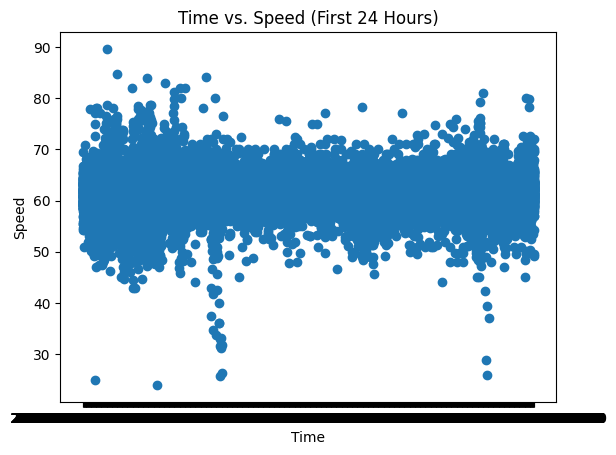

In [ ]:
# prompt: lot the data points on a scatter plot (time vs. speed) for first 24 hours

import matplotlib.pyplot as plt

# Assuming 'Time' and 'Speed' are the column names in your DataFrame
plt.scatter(df['Time'][:24*60*60], df['WAVE-NE-Speed'][:24*60*60])
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time vs. Speed (First 24 Hours)')
plt.show()


Coefficients: [2.40524097e-06]
Intercept: 61.65729784376599


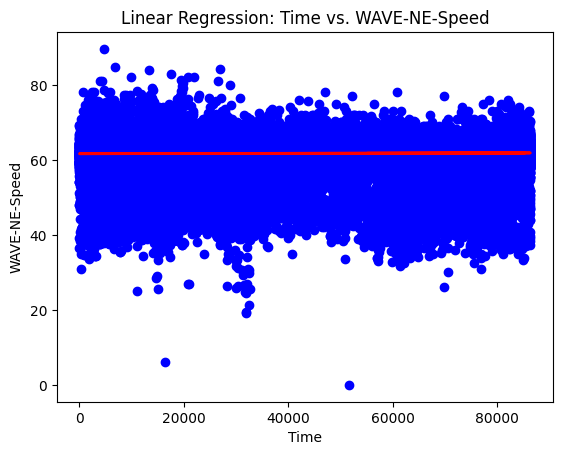

In [ ]:
# prompt: Train a simple linear regression model using Python (scikit-learn) and plot it

# Assuming 'Time' and 'Speed' are the column names in your DataFrame
X = df[['Time']]  # Features (independent variables)
y = df['WAVE-NE-Speed']    # Target (dependent variable)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model
model = LinearRegression()

# Convert 'Time' column to numerical representation
# (e.g., convert to seconds since a specific starting point)
X_train['Time'] = pd.to_datetime(X_train['Time'])
X_train['Time'] = (X_train['Time'] - X_train['Time'].min()).dt.total_seconds()

# Remove rows with NaN values in 'y_train'
X_train = X_train[~y_train.isna()]
y_train = y_train[~y_train.isna()]

# Train the model on the training data
model.fit(X_train, y_train)

# Print the model's coefficients (slope and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Make predictions on the training data
y_pred = model.predict(X_train)

# Plot the regression line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred, color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Linear Regression: Time vs. WAVE-NE-Speed')
plt.show()


In [ ]:
# prompt: Train a simple linear regression model using Python (scikit-learn)

# Assuming 'Time' and 'Speed' are the column names in your DataFrame
X = df[['Time']]  # Features (independent variables)
y = df['WAVE-NE-Count']    # Target (dependent variable)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model
model = LinearRegression()

# Convert 'Time' column to numerical representation
# (e.g., convert to seconds since a specific starting point)
X_train['Time'] = pd.to_datetime(X_train['Time'])
X_train['Time'] = (X_train['Time'] - X_train['Time'].min()).dt.total_seconds()

# Remove rows with NaN values in 'y_train'
X_train = X_train[~y_train.isna()]
y_train = y_train[~y_train.isna()]

# Train the model on the training data
model.fit(X_train, y_train)

# Print the model's coefficients (slope and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the testing data
X_test['Time'] = pd.to_datetime(X_test['Time'])
X_test['Time']

Coefficients: [0.00045406]
Intercept: 30.150560677110605


,Time
39792,2022-07-10 13:10:00
92992,2022-07-10 01:12:00
71051,2022-07-10 18:01:00
51273,2022-07-10 17:32:00
86831,2022-07-10 21:32:00
...,...
134222,2022-07-10 10:28:00
173600,2022-07-10 03:50:00
211770,2022-07-10 21:51:00
9054,2022-07-10 02:57:00


In [ ]:
# prompt: Use the testing data to evaluate the model’s performance

# X_test['Time'] = (X_test['Time'] - X_test['Time'].min()).dt.total_seconds() # This line is removed as the conversion has already been done
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

ValueError: Input contains NaN.

In [ ]:
# Make predictions on the testing data
X_test['Time'] = pd.to_datetime(X_test['Time'])
X_test['Time'] = (X_test['Time'] - X_test['Time'].min()).dt.total_seconds()

# Remove rows with NaN values in 'y_test'
X_test = X_test[~y_test.isna()]
y_test = y_test[~y_test.isna()]

y_pred = model.predict(X_test)

# Evaluate the model's performance (e.g., using R-squared)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# You can also calculate other metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared: 0.11205826066757829
Mean Squared Error: 1058.4403534494622
Mean Absolute Error: 28.211104282085316


In [ ]:
# prompt: Calculate metrics like Mean Absolute Error (MAE) or Root Mean Squared Error
# (RMSE)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have y_test and y_pred from your model's predictions

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 28.211104282085316
Root Mean Squared Error: 32.53368029365049


In [ ]:
# prompt: Split the dataset into training and testing sets

# Assuming 'Time' and 'Speed' are the column names in your DataFrame
X = df[['Time']]  # Features (independent variables)
y = df['WAVE-NE-Count']    # Target (dependent variable)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (178438, 1)
X_test shape: (44610, 1)
y_train shape: (178438,)
y_test shape: (44610,)


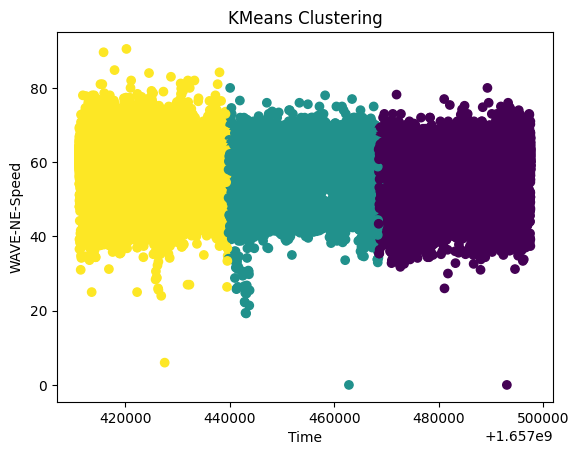

                 Time  WAVE-NE-Speed
Cluster                             
0        1.657483e+09      61.298599
1        1.657454e+09      62.627132
2        1.657425e+09      61.342769


In [ ]:
# prompt: Use KMeans clustering to group data points into clusters.

from sklearn.cluster import KMeans
import pandas as pd

# Assuming you have your data in a DataFrame called 'df' and want to cluster based on 'Time' and 'WAVE-NE-Count'
X = df[['Time', 'WAVE-NE-Speed']].dropna()  # Remove rows with NaN values

# Convert 'Time' column to numeric representation (seconds since epoch)
X['Time'] = pd.to_datetime(X['Time'])
X['Time'] = (X['Time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Choose the number of clusters (you can experiment with different values)
n_clusters = 3

# Create a KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame
X['Cluster'] = cluster_labels

# You can now analyze the clusters, for example, by plotting them:
# plt.scatter(X['Time'], X['WAVE-NE-Count'], c=X['Cluster']) # This line will cause an error if WAVE-NE-Count column is not present in the DataFrame
plt.scatter(X['Time'], X['WAVE-NE-Speed'], c=X['Cluster'])
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('KMeans Clustering')
plt.show()

# You can also analyze the characteristics of each cluster
# by looking at the mean values of your features within each cluster.
print(X.groupby('Cluster').mean())

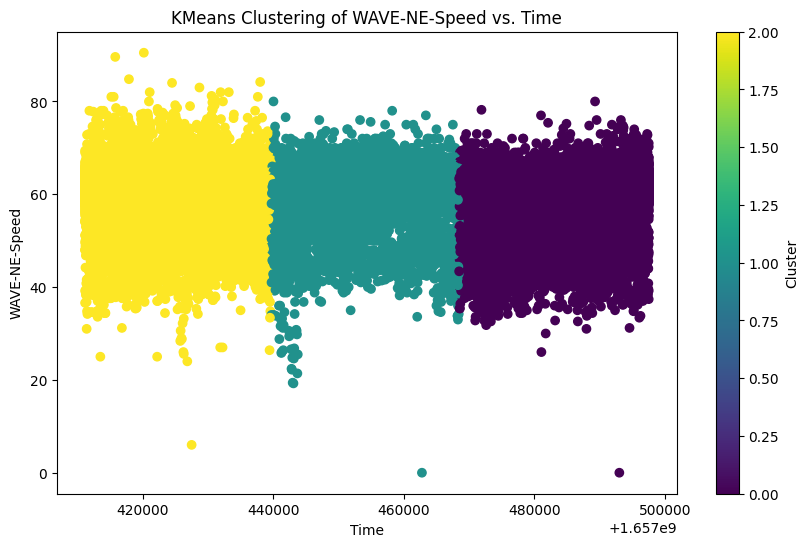

In [ ]:
# prompt: Visualize the clusters on the scatter plot.

# Assuming you have your data in a DataFrame called 'X' with 'Time', 'WAVE-NE-Speed', and 'Cluster' columns

# Visualize the clusters on the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(X['Time'], X['WAVE-NE-Speed'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('KMeans Clustering of WAVE-NE-Speed vs. Time')
plt.colorbar(label='Cluster')  # Add a colorbar to indicate cluster labels
plt.show()


In [ ]:
# prompt: Discuss the meaning of each cluster

# Assuming you have your data in a DataFrame called 'X' with 'Time', 'WAVE-NE-Speed', and 'Cluster' columns

# Analyze the characteristics of each cluster
cluster_analysis = X.groupby('Cluster').agg({'Time': ['mean', 'std'], 'WAVE-NE-Speed': ['mean', 'std']})
print(cluster_analysis)


# You can then interpret the clusters based on these characteristics.
# For example:

# * Cluster 0: Might represent periods with generally low WAVE-NE-Speed and a certain average time.
# * Cluster 1: Might indicate periods with moderate WAVE-NE-Speed and a different average time compared to cluster 0.
# * Cluster 2: Might correspond to periods with high WAVE-NE-Speed and potentially a different average time.

# Interpretation Example:
print("Possible Cluster Interpretations:")

for cluster_id in cluster_analysis.index:
    mean_speed = cluster_analysis.loc[cluster_id, ('WAVE-NE-Speed', 'mean')]
    mean_time = cluster_analysis.loc[cluster_id, ('Time', 'mean')]

    if mean_speed < 50:
        print(f"Cluster {cluster_id}: Low WAVE-NE-Speed, average Time: {mean_time}")
    elif 50 <= mean_speed < 100:
        print(f"Cluster {cluster_id}: Moderate WAVE-NE-Speed, average Time: {mean_time}")
    else:
        print(f"Cluster {cluster_id}: High WAVE-NE-Speed, average Time: {mean_time}")

# You can add more analysis (e.g., histograms, box plots) to further understand the clusters.


                 Time              WAVE-NE-Speed          
                 mean          std          mean       std
Cluster                                                   
0        1.657483e+09  8384.420609     61.298599  3.496872
1        1.657454e+09  8288.482155     62.627132  2.846879
2        1.657425e+09  8242.386775     61.342769  4.127170
Possible Cluster Interpretations:
Cluster 0: Moderate WAVE-NE-Speed, average Time: 1657482959.5505314
Cluster 1: Moderate WAVE-NE-Speed, average Time: 1657454118.1966138
Cluster 2: Moderate WAVE-NE-Speed, average Time: 1657425492.60672


In [ ]:
# prompt: Explore other clustering algorithms (e.g., DBSCAN, hierarchical clustering).

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Assuming you have your data in a DataFrame called 'X' with 'Time' and 'WAVE-NE-Speed' columns

# Preprocess the data by scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Time', 'WAVE-NE-Speed']])

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with these parameters
dbscan_labels = dbscan.fit_predict(X_scaled)

X['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Time'], X['WAVE-NE-Speed'], c=X['DBSCAN_Cluster'], cmap='viridis')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('DBSCAN Clustering of WAVE-NE-Speed vs. Time')
plt.colorbar(label='Cluster')
plt.show()

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # You can experiment with n_clusters
agg_labels = agg_clustering.fit_predict(X_scaled)

X['Hierarchical_Cluster'] = agg_labels

# Visualize Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Time'], X['WAVE-NE-Speed'], c=X['Hierarchical_Cluster'], cmap='viridis')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Hierarchical Clustering of WAVE-NE-Speed vs. Time')
plt.colorbar(label='Cluster')
plt.show()

# Dendrogram for Hierarchical clustering
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()


NameError: name 'X' is not defined

In [ ]:
# prompt: Explore other clustering algorithms (e.g., DBSCAN, hierarchical clustering).

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import pandas as pd # import pandas

# Assuming you have your data in a DataFrame called 'df' with 'Time' and 'WAVE-NE-Speed' columns
# Create a sample DataFrame (replace this with your actual data)
data = {'Time': [1678886400, 1678886460, 1678886520, 1678886580, 1678886640],
        'WAVE-NE-Speed': [55, 60, 62, 58, 53]}
df = pd.DataFrame(data)

# Convert 'Time' column to numeric representation (seconds since epoch)
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = (df['Time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Preprocess the data by scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Time', 'WAVE-NE-Speed']]) # Use df instead of X

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with these parameters
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels # Use df instead of X

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['WAVE-NE-Speed'], c=df['DBSCAN_Cluster'], cmap='viridis') # Use df instead of X
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('DBSCAN Clustering of WAVE-NE-Speed vs. Time')
plt.colorbar(label='Cluster')
plt.show()

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # You can experiment with n_clusters
agg_labels = agg_clustering.fit_predict(X_scaled)

df['Hierarchical_Cluster'] = agg_labels # Use df instead of X

# Visualize Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['WAVE-NE-Speed'], c=df['Hierarchical_Cluster'], cmap='viridis') # Use df instead of X
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Hierarchical Clustering of WAVE-NE-Speed vs. Time')
plt.colorbar(label='Cluster')
plt.show()

# Dendrogram for Hierarchical clustering
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

NameError: name 'plt' is not defined

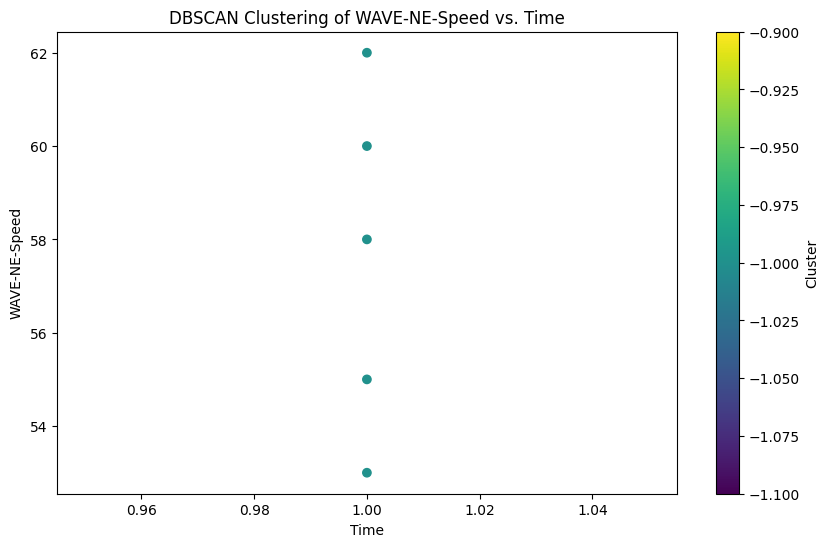

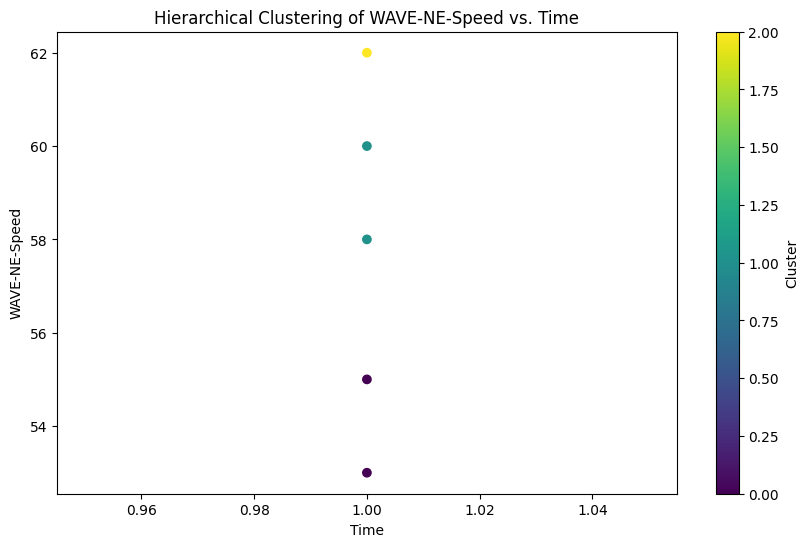

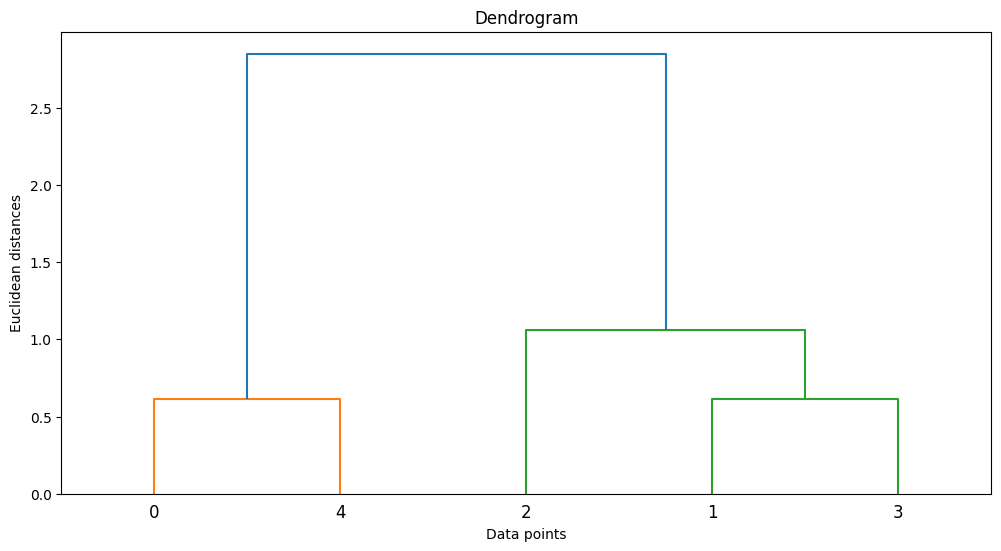

In [ ]:
# prompt: Explore other clustering algorithms (e.g., DBSCAN, hierarchical clustering).

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import pandas as pd # import pandas
import matplotlib.pyplot as plt # import matplotlib.pyplot

# Assuming you have your data in a DataFrame called 'df' with 'Time' and 'WAVE-NE-Speed' columns
# Create a sample DataFrame (replace this with your actual data)
data = {'Time': [1678886400, 1678886460, 1678886520, 1678886580, 1678886640],
        'WAVE-NE-Speed': [55, 60, 62, 58, 53]}
df = pd.DataFrame(data)

# Convert 'Time' column to numeric representation (seconds since epoch)
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = (df['Time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Preprocess the data by scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Time', 'WAVE-NE-Speed']]) # Use df instead of X

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with these parameters
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels # Use df instead of X

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['WAVE-NE-Speed'], c=df['DBSCAN_Cluster'], cmap='viridis') # Use df instead of X
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('DBSCAN Clustering of WAVE-NE-Speed vs. Time')
plt.colorbar(label='Cluster')
plt.show()

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # You can experiment with n_clusters
agg_labels = agg_clustering.fit_predict(X_scaled)

df['Hierarchical_Cluster'] = agg_labels # Use df instead of X

# Visualize Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['WAVE-NE-Speed'], c=df['Hierarchical_Cluster'], cmap='viridis') # Use df instead of X
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Hierarchical Clustering of WAVE-NE-Speed vs. Time')
plt.colorbar(label='Cluster')
plt.show()

# Dendrogram for Hierarchical clustering
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# prompt: In what scenarios would each clustering technique be most appropriate?

# In what scenarios would each clustering technique be most appropriate?

# KMeans:
# - Suitable for:
#   - Finding clusters with relatively equal sizes and spherical shapes.
#   - When the number of clusters is known or can be estimated beforehand.
#   - Situations where speed and efficiency are important (relatively faster than hierarchical and DBSCAN).
# - Example scenarios:
#   - Customer segmentation based on purchasing behavior.
#   - Image segmentation based on color or texture features.
#   - Document clustering based on word frequency.

# DBSCAN:
# - Suitable for:
#   - Discovering clusters of arbitrary shapes and sizes.
#   - Identifying outliers or noise in the data.
#   - When the number of clusters is not known in advance.
# - Example scenarios:
#   - Detecting anomalies in network traffic or sensor data.
#   - Grouping geographical locations based on density.
#   - Finding clusters in spatial data, where clusters may not be uniformly distributed.

# Hierarchical Clustering:
# - Suitable for:
#   - Understanding the hierarchical relationships between data points.
#   - When you want to explore the structure of the data at multiple levels of granularity.
#   - Generating a dendrogram to visualize the clustering process.
# - Example scenarios:
#   - Gene expression analysis (clustering genes with similar expression patterns).
#   - Social network analysis (identifying communities or groups).
#   - Taxonomy and classification tasks (grouping organisms based on evolutionary relationships).

# In summary:
# - If you know the number of clusters and need a fast and efficient algorithm, KMeans is a good choice.
# - If you want to discover clusters of various shapes and sizes, including outlier detection, consider DBSCAN.
# - If you need to understand the hierarchy and relationships between data points and visualize the clustering process, hierarchical clustering is more appropriate.

# Note: Choosing the best technique depends on the specific data, the desired outcome, and the computational resources available.
# It's often beneficial to experiment with multiple clustering techniques and compare their results to see which one provides the most meaningful and useful clustering for your application.


In [ ]:
!pip install xlrd
import pandas as pd

df = pd.read_excel('/content/Ames_August_Crashes.xls') # Use read_excel for .xls files
print(df)

    Unnamed: 0   Unnamed: 1  Unnamed: 2     Unnamed: 3  \
0          NaN          NaN         NaN            NaN   
1          NaN          NaN         NaN            NaN   
2          NaN          NaN         NaN            NaN   
3          NaN          NaN         NaN            NaN   
4         Date   DOT Case #         NaN  Agency Case #   
5   08/01/2024  20241436054         NaN       24002750   
6   08/01/2024  20241435378         NaN       24002751   
7   08/02/2024  20241435839         NaN       24002760   
8   08/02/2024  20241436408         NaN       24002762   
9   08/04/2024  20241435605         NaN       24002790   
10  08/05/2024  20241435735         NaN       24002805   
11  08/05/2024  20241436913         NaN       24002801   
12  08/05/2024  20241437081         NaN       24002803   
13  08/07/2024  20241436409         NaN       24002838   
14  08/08/2024  20241438168         NaN       24002844   
15  08/10/2024  20241441531         NaN     24002875-A   
16  08/11/2024

In [ ]:
# prompt: Display the first few rows of the dataset using df.head()

print(df.head())


  Unnamed: 0  Unnamed: 1  Unnamed: 2     Unnamed: 3                Unnamed: 4  \
0        NaN         NaN         NaN            NaN                       NaN   
1        NaN         NaN         NaN            NaN  Abbreviated Crash Report   
2        NaN         NaN         NaN            NaN                       NaN   
3        NaN         NaN         NaN            NaN                       NaN   
4       Date  DOT Case #         NaN  Agency Case #                       NaN   

  Unnamed: 5 Unnamed: 6 Unnamed: 7           Unnamed: 8  
0        NaN        NaN        NaN                  NaN  
1        NaN        NaN        NaN                  NaN  
2        NaN        NaN        NaN                  NaN  
3        NaN        NaN        NaN                  NaN  
4       City     County   Severity  Literal Description  


In [ ]:
# prompt: Check for missing values and data types using df.info()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  52 non-null     object 
 1   Unnamed: 1  52 non-null     object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  52 non-null     object 
 4   Unnamed: 4  1 non-null      object 
 5   Unnamed: 5  52 non-null     object 
 6   Unnamed: 6  52 non-null     object 
 7   Unnamed: 7  52 non-null     object 
 8   Unnamed: 8  52 non-null     object 
dtypes: float64(1), object(8)
memory usage: 4.1+ KB


In [ ]:
# prompt: Create summary statistics using df.describe()

summary_stats = df.describe()
print(summary_stats)


       Unnamed: 2
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


In [ ]:
# prompt: Identify the target variable = Severity

# Assuming 'Severity' is the target variable
target_variable = 'Severity'


In [ ]:
# prompt: Select relevant features for prediction : Time of day, driver age, vehicle type

# Select relevant features
features = ['Time', 'Driver Age', 'Vehicle Type']

# Create a new DataFrame with only the selected features and target variable
df_selected = df[features + [target_variable]].copy()

# Print the first few rows of the selected DataFrame
print(df_selected.head())


KeyError: "None of [Index(['Time', 'Driver Age', 'Vehicle Type', 'Severity'], dtype='object')] are in the [columns]"

In [ ]:
df = pd.read_csv('/content/Ames_August_Crashes.csv')
print(df)

    Unnamed: 0   Unnamed: 1  Unnamed: 2     Unnamed: 3  \
0          NaN          NaN         NaN            NaN   
1          NaN          NaN         NaN            NaN   
2          NaN          NaN         NaN            NaN   
3          NaN          NaN         NaN            NaN   
4         Date   DOT Case #         NaN  Agency Case #   
5   08/01/2024  20241436054         NaN       24002750   
6   08/01/2024  20241435378         NaN       24002751   
7   08/02/2024  20241435839         NaN       24002760   
8   08/02/2024  20241436408         NaN       24002762   
9   08/04/2024  20241435605         NaN       24002790   
10  08/05/2024  20241435735         NaN       24002805   
11  08/05/2024  20241436913         NaN       24002801   
12  08/05/2024  20241437081         NaN       24002803   
13  08/07/2024  20241436409         NaN       24002838   
14  08/08/2024  20241438168         NaN       24002844   
15  08/10/2024  20241441531         NaN     24002875-A   
16  08/11/2024

In [ ]:
# prompt: Identify the target variable = Severity

# Assuming 'Severity' is the target variable
target_variable = 'Severity'

In [ ]:
import pandas as pd

# Define the path to your CSV file
input_file_path = 'path_to_your_file.csv'
output_file_path = 'cleaned_crash_report.csv'

# Read the CSV file while skipping unnecessary rows
df = pd.read_csv('/content/Ames_August_Crashes.csv', skiprows=6)

# Clean up any unwanted columns (if needed)
# Here, we drop the empty columns that resulted from the original formatting
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Optionally, reset the index if needed
df.reset_index(drop=True, inplace=True)

# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"CSV file has been cleaned and saved as '{output_file_path}'.")


CSV file has been cleaned and saved as 'cleaned_crash_report.csv'.


In [ ]:
# prompt: Display the first few rows of the dataset using df.head().
# Check for missing values and data types using df.info().
# Create summary statistics using df.describe().

# Display the first few rows of the dataset
print(df.head())

# Check for missing values and data types
df.info()

# Create summary statistics
summary_stats = df.describe()
print(summary_stats)


   08/01/2024   20241436054  24002750  Ames  Story  \
0  08/01/2024  2.024144e+10  24002751  Ames  Story   
1  08/02/2024  2.024144e+10  24002760  Ames  Story   
2  08/02/2024  2.024144e+10  24002762  Ames  Story   
3  08/04/2024  2.024144e+10  24002790  Ames  Story   
4  08/05/2024  2.024144e+10  24002805  Ames  Story   

             Property Damage Only  \
0  Suspected Serious Injury Crash   
1   Possible/Unknown Injury Crash   
2            Property Damage Only   
3            Property Damage Only   
4            Property Damage Only   

  US 69 S                                                                                                                                                                                                                                                         
0  VALLEY VIEW RD AND HARRISON RD                ...                                                                                                                                             

In [ ]:
# prompt: Identify the target variable = crash severity

target_variable = 'Severity'


In [38]:
# prompt: Use pandas to load the CSV data

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/CrashData.csv', skiprows=6)

# Print the first few rows to verify the data is loaded correctly
print(df)


<ipython-input-38-15fcd9eeebb9>:6: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/CrashData.csv', skiprows=6)


       19  Iowa  190001  1  13.0             Top  0  0.1  1.1  1.2  ...  \
0      19  Iowa  190001  1  13.0             Top  0    0    1    1  ...   
1      19  Iowa  190001  1  13.0             Top  0    0    1    1  ...   
2      19  Iowa  190002  1   9.0   9 Clock Value  0    0    1    1  ...   
3      19  Iowa  190002  1   9.0   9 Clock Value  0    0    1    1  ...   
4      19  Iowa  190002  1  13.0             Top  0    0    1    1  ...   
...    ..   ...     ... ..   ...             ... ..  ...  ...  ...  ...   
36270  19  Iowa  190331  1  13.0             Top  0    0    1    1  ...   
36271  19  Iowa  190331  1  13.0             Top  0    0    1    1  ...   
36272  19  Iowa  190332  1  12.0  12 Clock Value  0    0    1    1  ...   
36273  19  Iowa  190333  1  12.0  12 Clock Value  0    0    1    1  ...   
36274  19  Iowa  190333  1  12.0  12 Clock Value  0    0    1    1  ...   

       Unnamed: 243  Unnamed: 244  Unnamed: 245  Unnamed: 246 Unnamed: 247  \
0               NaN  

In [39]:
# prompt: Display the first few rows of the dataset using df.head().

print(df.head())


   19  Iowa  190001  1  13.0            Top  0  0.1  1.1  1.2  ...  \
0  19  Iowa  190001  1  13.0            Top  0    0    1    1  ...   
1  19  Iowa  190001  1  13.0            Top  0    0    1    1  ...   
2  19  Iowa  190002  1   9.0  9 Clock Value  0    0    1    1  ...   
3  19  Iowa  190002  1   9.0  9 Clock Value  0    0    1    1  ...   
4  19  Iowa  190002  1  13.0            Top  0    0    1    1  ...   

   Unnamed: 243  Unnamed: 244  Unnamed: 245  Unnamed: 246 Unnamed: 247  \
0           NaN           NaN           NaN           NaN          NaN   
1           NaN           NaN           NaN           NaN          NaN   
2           NaN           NaN           NaN           NaN          NaN   
3           NaN           NaN           NaN           NaN          NaN   
4           NaN           NaN           NaN           NaN          NaN   

   Unnamed: 248 Unnamed: 249  Unnamed: 250 Unnamed: 251  Unnamed: 252  
0           NaN          NaN           NaN          NaN       

In [4]:
# prompt: Check for missing values and data types using df.info().

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Columns: 253 entries, 19 to Unnamed: 252
dtypes: float64(44), int64(94), object(115)
memory usage: 70.0+ MB


In [43]:
# prompt: Create summary statistics using df.describe()

print(df.describe())


            19         190001             1          13.0             0  \
count  36275.0   36275.000000  36275.000000  18611.000000  36275.000000   
mean      19.0  190121.581502      3.020538      9.508785      0.044493   
std        0.0     100.470608      2.939408      8.355145      0.257125   
min       19.0  190001.000000      1.000000      1.000000      0.000000   
25%       19.0  190019.000000      1.000000      6.000000      0.000000   
50%       19.0  190098.000000      2.000000     11.000000      0.000000   
75%       19.0  190208.000000      3.000000     12.000000      0.000000   
max       19.0  190333.000000     12.000000     99.000000      4.000000   

                0.1           1.1           1.2           0.2           1.3  \
count  36275.000000  36275.000000  36275.000000  36275.000000  36275.000000   
mean       0.052819      4.773150      4.617891      0.155258      6.225086   
std        0.283275      4.171016      3.960203      0.384673      4.647594   
min     

In [47]:
# prompt: Use pandas to load the CSV data

import pandas as pd

df = pd.read_csv('/content/CrashData.csv')
print(df)

<ipython-input-47-d59b4eeedd36>:5: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/CrashData.csv')


       STATE STATENAME  ST_CASE  VEH_NO_x  DAMAGE      DAMAGENAME  PEDS  \
0         19      Iowa   190001         1    11.0  11 Clock Value     0   
1         19      Iowa   190001         1    11.0  11 Clock Value     0   
2         19      Iowa   190001         1    11.0  11 Clock Value     0   
3         19      Iowa   190001         1    11.0  11 Clock Value     0   
4         19      Iowa   190001         1    13.0             Top     0   
...      ...       ...      ...       ...     ...             ...   ...   
36276     19      Iowa   190331         1    13.0             Top     0   
36277     19      Iowa   190331         1    13.0             Top     0   
36278     19      Iowa   190332         1    12.0  12 Clock Value     0   
36279     19      Iowa   190333         1    12.0  12 Clock Value     0   
36280     19      Iowa   190333         1    12.0  12 Clock Value     0   

       PERNOTMVIT  VE_TOTAL  VE_FORMS_x  ...  DRUGRES3  DRUGRES3NAME  P_SF1  \
0               0   

In [48]:
# prompt: Use pandas to load the CSV data

import pandas as pd

df = pd.read_csv('/content/CrashData.csv')
print(df)


<ipython-input-48-d59b4eeedd36>:5: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/CrashData.csv')


       STATE STATENAME  ST_CASE  VEH_NO_x  DAMAGE      DAMAGENAME  PEDS  \
0         19      Iowa   190001         1    11.0  11 Clock Value     0   
1         19      Iowa   190001         1    11.0  11 Clock Value     0   
2         19      Iowa   190001         1    11.0  11 Clock Value     0   
3         19      Iowa   190001         1    11.0  11 Clock Value     0   
4         19      Iowa   190001         1    13.0             Top     0   
...      ...       ...      ...       ...     ...             ...   ...   
36276     19      Iowa   190331         1    13.0             Top     0   
36277     19      Iowa   190331         1    13.0             Top     0   
36278     19      Iowa   190332         1    12.0  12 Clock Value     0   
36279     19      Iowa   190333         1    12.0  12 Clock Value     0   
36280     19      Iowa   190333         1    12.0  12 Clock Value     0   

       PERNOTMVIT  VE_TOTAL  VE_FORMS_x  ...  DRUGRES3  DRUGRES3NAME  P_SF1  \
0               0   

In [49]:
# prompt: Check for missing values and data types using df.info().

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36281 entries, 0 to 36280
Columns: 253 entries, STATE to RACENAME
dtypes: float64(44), int64(94), object(115)
memory usage: 70.0+ MB


In [50]:
# prompt: Create summary statistics using df.describe()

print(df.describe())

         STATE        ST_CASE      VEH_NO_x        DAMAGE          PEDS  \
count  36281.0   36281.000000  36281.000000  18617.000000  36281.000000   
mean      19.0  190121.561561      3.020203      9.509481      0.044486   
std        0.0     100.474264      2.939280      8.353906      0.257104   
min       19.0  190001.000000      1.000000      1.000000      0.000000   
25%       19.0  190019.000000      1.000000      6.000000      0.000000   
50%       19.0  190098.000000      2.000000     11.000000      0.000000   
75%       19.0  190208.000000      3.000000     12.000000      0.000000   
max       19.0  190333.000000     12.000000     99.000000      4.000000   

         PERNOTMVIT      VE_TOTAL    VE_FORMS_x      PVH_INVL       PERSONS  \
count  36281.000000  36281.000000  36281.000000  36281.000000  36281.000000   
mean       0.052810      4.772526      4.617293      0.155233      6.224222   
std        0.283252      4.170953      3.960148      0.384646      4.647696   
min     

In [51]:
# prompt: Identify the target variable = INJ_SEV

target_variable = df['INJ_SEV']
print(target_variable)

0        4
1        4
2        4
3        4
4        4
        ..
36276    4
36277    4
36278    4
36279    4
36280    4
Name: INJ_SEV, Length: 36281, dtype: int64


In [52]:
# prompt: Select relevant features for prediction: HOUR_x, AGE, BODY_TYP

selected_features = df[['HOUR_x', 'AGE', 'BODY_TYP']]
print(selected_features)

       HOUR_x  AGE  BODY_TYP
0          23   47       4.0
1          23   47       4.0
2          23   47       4.0
3          23   47       4.0
4          23   47       4.0
...       ...  ...       ...
36276      23   20       4.0
36277      23   20       4.0
36278      22   28      80.0
36279      15   52       4.0
36280      15   52       4.0

[36281 rows x 3 columns]


In [53]:
# prompt: Split the data into features (X) and target variable (y)

X = df[['HOUR_x', 'AGE', 'BODY_TYP']]
y = df['INJ_SEV']

In [54]:
# prompt:  split the data into training sets(80%) and testing sets(20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# prompt: Import RandomForestClassifier from sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier


In [56]:
# prompt: Create a Random Forest model with n_estimators=100

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [57]:
# prompt: Fit the model to the training data

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [58]:
# prompt: Make Predictions and Evaluate: "INJ_SEV" by "AGE" group.

from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test)

# Evaluate overall performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Evaluate performance by 'AGE' group
for age_group in df['AGE'].unique():
    X_test_age = X_test[df['AGE'] == age_group]
    y_test_age = y_test[df['AGE'] == age_group]
    if not X_test_age.empty:
        y_pred_age = rf_model.predict(X_test_age)
        accuracy_age = accuracy_score(y_test_age, y_pred_age)
        print(f"\nAccuracy for AGE group {age_group}: {accuracy_age}")
        print(classification_report(y_test_age, y_pred_age))


Overall Accuracy: 0.9147030453355381
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2538
           1       0.96      0.93      0.94       758
           2       0.82      0.83      0.83       705
           3       0.79      0.84      0.81       750
           4       0.92      0.90      0.91      2458
           5       1.00      0.70      0.82        10
           9       0.76      0.82      0.78        38

    accuracy                           0.91      7257
   macro avg       0.89      0.86      0.87      7257
weighted avg       0.92      0.91      0.92      7257


Accuracy for AGE group 47: 0.967741935483871
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         1
           4       0.95      1.00      0.97        39

    accuracy                           0.97     

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/met

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.93      1.00      0.96        27

    accuracy                           0.95        40
   macro avg       0.79      0.77      0.77        40
weighted avg       0.93      0.95      0.94        40


Accuracy for AGE group 12: 0.6086956521739131
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.31      1.00      0.47         4
           3       0.00      0.00      0.00         3
           4       1.00      0.54      0.70        13

    accuracy                           0.61        23
   macro avg       0.58      0.63      0.54        23
weighted avg       0.75      0.61      0.61        23


Accuracy for AGE group 22: 0

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p


Accuracy for AGE group 34: 0.8731343283582089
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           2       0.56      1.00      0.72        19
           3       1.00      0.26      0.42        19
           4       1.00      0.86      0.92        21

    accuracy                           0.87       134
   macro avg       0.88      0.78      0.76       134
weighted avg       0.92      0.87      0.86       134


Accuracy for AGE group 59: 0.9038461538461539
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         2
           4       1.00      0.82      0.90        28

    accuracy                           0.90        52
   macro avg       0.88      0.96      0.91        52
weighted avg       0.93      0.90    

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]



Accuracy for AGE group 35: 0.9206349206349206
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       1.00      1.00      1.00         7
           2       0.81      1.00      0.89        21
           3       1.00      1.00      1.00         5
           4       1.00      0.91      0.95        22

    accuracy                           0.92        63
   macro avg       0.96      0.91      0.92        63
weighted avg       0.94      0.92      0.92        63


Accuracy for AGE group 67: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        17

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        3

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_cl


Accuracy for AGE group 70: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           2       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        30

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91


Accuracy for AGE group 52: 0.9675675675675676
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.95      0.95      0.95        19
           2       0.92      0.85      0.88        13
           3       0.80      0.92      0.86        13
           4       0.98      0.98      0.98        59

    accuracy                           0.97       185
   macro avg       0.93      0.94      0.93       185
weighted avg       0.97      0.97      0.97       185


Accuracy for AGE group 80: 1.0
              preci

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]



Accuracy for AGE group 33: 0.9141104294478528
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       112
           1       0.67      0.57      0.62         7
           2       1.00      0.50      0.67         6
           3       1.00      0.60      0.75         5
           4       0.76      0.94      0.84        33

    accuracy                           0.91       163
   macro avg       0.88      0.72      0.77       163
weighted avg       0.92      0.91      0.91       163


Accuracy for AGE group 43: 0.9766536964980544
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       205
           1       0.88      0.64      0.74        11
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         4
           4       1.00      0.88      0.94        17

    accuracy                           0.98       257
   macro avg       0.97      0.90    

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]



Accuracy for AGE group 31: 0.8283582089552238
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        68
           1       0.60      1.00      0.75         9
           2       0.69      0.69      0.69        13
           3       0.43      0.50      0.46         6
           4       0.91      0.60      0.72        35
           5       1.00      0.33      0.50         3

    accuracy                           0.83       134
   macro avg       0.76      0.69      0.68       134
weighted avg       0.85      0.83      0.82       134


Accuracy for AGE group 26: 0.9252336448598131
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       1.00      1.00      1.00        16
           2       0.94      1.00      0.97        15
           3       1.00      0.57      0.73         7
           4       0.91      0.91      0.91        47
           9       0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.97      1.00      0.98        31
           2       1.00      0.83      0.91         6
           3       0.85      1.00      0.92        11
           4       0.96      0.92      0.94        24

    accuracy                           0.97       130
   macro avg       0.95      0.95      0.95       130
weighted avg       0.97      0.97      0.97       130


Accuracy for AGE group 15: 0.859375
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       1.00      0.95      0.97        20
           3       0.71      0.71      0.71        14
           4       0.84      0.96      0.90        27

    accuracy                           0.86        64
   macro avg       0.64      0.66      0.65        64
weighted avg       0.82      0.86      0.84        64


Accuracy for AGE group 79: 0.96
      

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]



Accuracy for AGE group 53: 0.9647058823529412
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        16
           2       0.75      0.86      0.80         7
           3       0.88      0.78      0.82         9
           4       1.00      1.00      1.00        47

    accuracy                           0.96        85
   macro avg       0.93      0.93      0.92        85
weighted avg       0.97      0.96      0.96        85


Accuracy for AGE group 16: 0.918918918918919
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           2       0.73      0.92      0.81        12
           3       1.00      1.00      1.00        11
           4       0.97      0.88      0.92        41

    accuracy                           0.92        74
   macro avg       0.90      0.95      0.92        74
weighted avg       0.93      0.92     

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]



Accuracy for AGE group 0: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Accuracy for AGE group 66: 0.8490566037735849
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       1.00      0.73      0.84        11
           4       0.72      1.00      0.84        18
           9       1.00      1.00      1.00         2

    accuracy                           0.85        53
   macro avg       0.93      0.86      0.88        53

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will 

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Accuracy for AGE group 91: 1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Accuracy for AGE group 81: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        32

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Accuracy

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         4
           4       0.92      0.92      0.92        25

    accuracy                           0.93        57
   macro avg       0.96      0.88      0.90        57
weighted avg       0.93      0.93      0.93        57


Accuracy for AGE group 23: 0.7096774193548387
              precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       0.88      1.00      0.93         7
           2       1.00      0.09      0.17        11
           3       0.60      0.75      0.67         4
           4       0.78      0.91      0.84        35
           9       0.00      0.00      0.00         2

    accuracy                           0.71        62
   macro avg       0.57      0

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00        28
           3       0.88      1.00      0.93         7
           4       0.96      0.96      0.96        28

    accuracy                           0.97       103
   macro avg       0.93      0.98      0.95       103
weighted avg       0.97      0.97      0.97       103


Accuracy for AGE group 63: 0.927536231884058
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.75      0.86         4
           3       1.00      0.80      0.89        20
           4       0.87      1.00      0.93        33

    accuracy                           0.93        69
   macro avg       0.97      0.89      0.92        69
weighted avg       0.94      0.93      0.93        69


Accuracy for AGE group 54: 0.

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]



Accuracy for AGE group 25: 0.9159663865546218
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       1.00      0.20      0.33         5
           2       0.94      0.84      0.89        19
           3       0.82      1.00      0.90        14
           4       0.98      0.93      0.96        46
           5       1.00      1.00      1.00         4

    accuracy                           0.92       119
   macro avg       0.93      0.83      0.83       119
weighted avg       0.92      0.92      0.91       119


Accuracy for AGE group 83: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        1

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]



Accuracy for AGE group 40: 0.8522727272727273
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      1.00      1.00        17
           2       1.00      0.33      0.50         6
           3       0.60      0.55      0.57        11
           4       0.82      0.88      0.85        32

    accuracy                           0.85        88
   macro avg       0.86      0.75      0.77        88
weighted avg       0.86      0.85      0.84        88


Accuracy for AGE group 72: 0.9753086419753086
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       1.00      0.97      0.98        65
           9       0.50      1.00      0.67         1

    accuracy                         

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]



Accuracy for AGE group 10: 0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.88      0.93         8
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         1

    accuracy                           0.94        18
   macro avg       0.95      0.97      0.96        18
weighted avg       0.96      0.94      0.95        18


Accuracy for AGE group 85: 0.8
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.80      1.00      0.89         8

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10


Accuracy for AGE group 97: 1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         4

    accuracy     

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 


Accuracy for AGE group 89: 1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Accuracy for AGE group 88: 1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7


Accuracy for AGE group 1: 1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00

<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_age = X_test[df['AGE'] == age_group]
<ipython-input-58-10de61c349c3>:14: UserWarning: Boo

In [59]:
# prompt: Calculate accuracy score using accuracy_score from sklearn.metrics

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9147030453355381


In [60]:
# prompt: Generate a classification report using classification_report from
# sklearn.metrics.

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2538
           1       0.96      0.93      0.94       758
           2       0.82      0.83      0.83       705
           3       0.79      0.84      0.81       750
           4       0.92      0.90      0.91      2458
           5       1.00      0.70      0.82        10
           9       0.76      0.82      0.78        38

    accuracy                           0.91      7257
   macro avg       0.89      0.86      0.87      7257
weighted avg       0.92      0.91      0.92      7257

